## 1. Introdução
<p>Este <i>dataset</i> contém dados meteorológicos do Aeroporto Internacional de Raleigh Durham retirados do serviço da Web do NOAA.</p>

## 2. Lendo os Dados

In [1]:
import pandas as pd

# As colunas estão separadas pelo símbolo ';' #. 
weather_history = pd.read_csv('rdu-weather-history.csv', sep=';')

## 3. Visão geral
<p>O <i>dataset</i> contém informação sobre dados meteorológicos do Aeroporto Internacional de Raleigh Durham, desde 2007. Possui dados como temperaturas mínimas e máximas, volume de chuva, velocidade do vento e etc.</p>   
</p>Visualizando as primeiras cinco entradas do DataFrame:</p>    

In [2]:
weather_history.head()

,date,temperaturemin,temperaturemax,precipitation,snowfall,snowdepth,avgwindspeed,fastest2minwinddir,fastest2minwindspeed,fastest5secwinddir,...,drizzle,snow,freezingrain,smokehaze,thunder,highwind,hail,blowingsnow,dust,freezingfog
0,2009-10-03,55.0,82.0,0.00,0.0,0.0,2.91,240.0,16.11,230.0,...,No,No,No,No,No,No,No,No,No,No
1,2009-10-10,59.0,79.0,0.02,0.0,0.0,7.83,220.0,17.00,220.0,...,No,No,No,No,No,No,Yes,No,No,No
2,2009-10-14,46.9,61.0,0.14,0.0,0.0,8.72,40.0,14.99,50.0,...,Yes,No,No,No,No,No,Yes,No,No,No
3,2009-10-17,45.0,57.9,0.00,0.0,0.0,6.26,30.0,14.09,40.0,...,No,No,No,No,No,No,No,No,No,No
4,2009-10-29,48.0,68.0,0.00,0.0,0.0,5.82,80.0,14.99,70.0,...,No,No,No,No,No,No,No,No,No,No


In [3]:
# Número de entradas
print("Número de linhas do dataset:", weather_history.shape[0])

print("\n\nResumo estatístico do DataFrame:")
weather_history.describe()

('N\xc3\xbamero de linhas do dataset:', 4137)


Resumo estatístico do DataFrame:


,temperaturemin,temperaturemax,precipitation,snowfall,snowdepth,avgwindspeed,fastest2minwinddir,fastest2minwindspeed,fastest5secwinddir,fastest5secwindspeed
count,4136.000000,4136.000000,4136.000000,4135.000000,4136.000000,4134.000000,4135.000000,4135.000000,4118.000000,4118.000000
mean,50.540063,72.017021,0.126630,0.012965,0.017384,5.860614,172.541717,15.957151,177.056824,21.801610
std,16.229527,16.530515,0.371318,0.195214,0.213953,2.958446,94.603272,5.270319,96.850988,7.096004
min,4.100000,23.200000,0.000000,0.000000,0.000000,0.000000,10.000000,4.920000,10.000000,6.930000
25%,37.000000,60.100000,0.000000,0.000000,0.000000,3.580000,80.000000,12.970000,90.000000,17.000000
50%,52.000000,73.900000,0.000000,0.000000,0.000000,5.370000,210.000000,14.990000,210.000000,21.030000
75%,64.900000,86.000000,0.040000,0.000000,0.000000,7.610000,240.000000,18.120000,240.000000,25.050000
max,80.100000,105.100000,6.450000,6.690000,5.910000,19.010000,360.000000,59.950000,360.000000,86.120000


In [4]:
weather_history.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4137 entries, 0 to 4136
Data columns (total 28 columns):
date                    4137 non-null object
temperaturemin          4136 non-null float64
temperaturemax          4136 non-null float64
precipitation           4136 non-null float64
snowfall                4135 non-null float64
snowdepth               4136 non-null float64
avgwindspeed            4134 non-null float64
fastest2minwinddir      4135 non-null float64
fastest2minwindspeed    4135 non-null float64
fastest5secwinddir      4118 non-null float64
fastest5secwindspeed    4118 non-null float64
fog                     4137 non-null object
fogheavy                4137 non-null object
mist                    4137 non-null object
rain                    4137 non-null object
fogground               4137 non-null object
ice                     4137 non-null object
glaze                   4137 non-null object
drizzle                 4137 non-null object
snow                    4137

## 3.1 Utilizando a função Seaborn de mapas de calor
<p>Seaborn é uma biblioteca em python para criação de visualizações estatísticas.</p>
<p>O método ```.corr() ```, calcula o <b>coeficiente de correlação de Pearson</b> entre todos os pares de colunas numéricas do DataFrame.</p>
<p>Interpretando o coeficiente:
- 0.9 para mais ou para menos indica uma correlação muito forte.
- 0.7 a 0.9 positivo ou negativo indica uma correlação forte.
- 0.5 a 0.7 positivo ou negativo indica uma correlação moderada.
- 0.3 a 0.5 positivo ou negativo indica uma correlação fraca.
- 0 a 0.3 positivo ou negativo indica uma correlação desprezível.

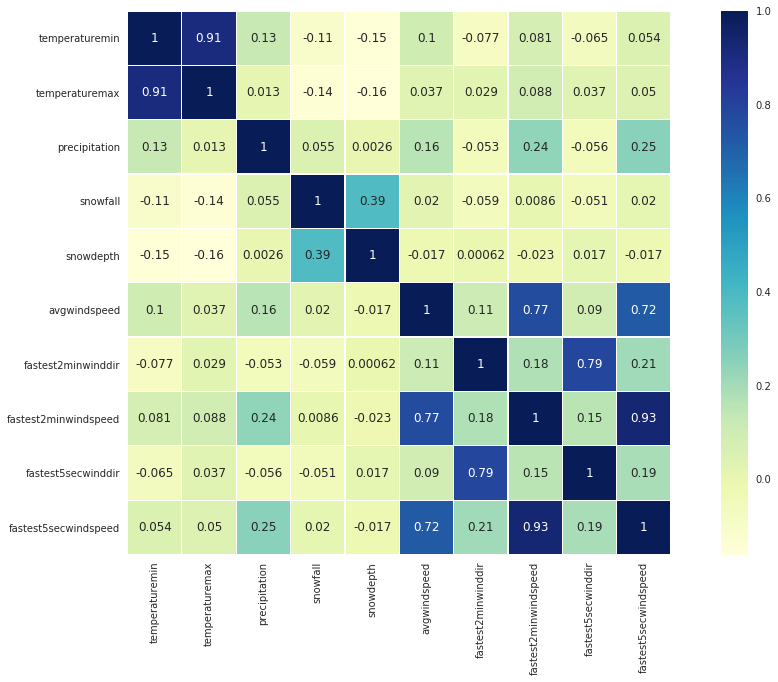

In [6]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

plt.figure(figsize=(18,10))
weather_map = sns.heatmap(weather_history.corr(), annot=True, square=True, cmap="YlGnBu", linewidths=.3)


## 4. Pré-processamento dos dados

In [7]:
# Substituindo as string por números binários -- No = 0 e Yes = 1

weather_history = weather_history.replace('No', 0.0)
weather_history = weather_history.replace('Yes', 1.0)

In [8]:
# Verificando a soma dos valores nulos em cada feature

weather_history.isnull().sum()

date                     0
temperaturemin           1
temperaturemax           1
precipitation            1
snowfall                 2
snowdepth                1
avgwindspeed             3
fastest2minwinddir       2
fastest2minwindspeed     2
fastest5secwinddir      19
fastest5secwindspeed    19
fog                      0
fogheavy                 0
mist                     0
rain                     0
fogground                0
ice                      0
glaze                    0
drizzle                  0
snow                     0
freezingrain             0
smokehaze                0
thunder                  0
highwind                 0
hail                     0
blowingsnow              0
dust                     0
freezingfog              0
dtype: int64

In [9]:
from sklearn.preprocessing import Imputer
import numpy as np

#Substituindo os valores nulos pela média dos valores referentes a feature
imputer = Imputer(missing_values=np.nan, strategy='median', axis=0)
weather_history[['temperaturemin']] = imputer.fit_transform(weather_history[['temperaturemin']])
weather_history[['temperaturemax']] = imputer.fit_transform(weather_history[['temperaturemax']])
weather_history[['precipitation']] = imputer.fit_transform(weather_history[['precipitation']])
weather_history[['snowfall']] = imputer.fit_transform(weather_history[['snowfall']])
weather_history[['snowdepth']] = imputer.fit_transform(weather_history[['snowdepth']])
weather_history[['avgwindspeed']] = imputer.fit_transform(weather_history[['avgwindspeed']])
weather_history[['fastest2minwinddir']] = imputer.fit_transform(weather_history[['fastest2minwinddir']])
weather_history[['fastest2minwindspeed']] = imputer.fit_transform(weather_history[['fastest2minwindspeed']])
weather_history[['fastest5secwinddir']] = imputer.fit_transform(weather_history[['fastest5secwinddir']])
weather_history[['fastest5secwindspeed']] = imputer.fit_transform(weather_history[['fastest5secwindspeed']])

weather_history.isnull().sum()

date                    0
temperaturemin          0
temperaturemax          0
precipitation           0
snowfall                0
snowdepth               0
avgwindspeed            0
fastest2minwinddir      0
fastest2minwindspeed    0
fastest5secwinddir      0
fastest5secwindspeed    0
fog                     0
fogheavy                0
mist                    0
rain                    0
fogground               0
ice                     0
glaze                   0
drizzle                 0
snow                    0
freezingrain            0
smokehaze               0
thunder                 0
highwind                0
hail                    0
blowingsnow             0
dust                    0
freezingfog             0
dtype: int64

In [10]:
#Ordenando o dataset pela coluna data

weather_history = weather_history.sort_values('date', ascending=True)
weather_history.head()

,date,temperaturemin,temperaturemax,precipitation,snowfall,snowdepth,avgwindspeed,fastest2minwinddir,fastest2minwindspeed,fastest5secwinddir,...,drizzle,snow,freezingrain,smokehaze,thunder,highwind,hail,blowingsnow,dust,freezingfog
2070,2007-01-01,48.9,68.0,0.45,0.0,0.0,12.75,190.0,25.05,180.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
813,2007-01-02,32.0,55.9,0.00,0.0,0.0,3.13,320.0,12.97,330.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
814,2007-01-03,28.9,62.1,0.00,0.0,0.0,2.24,220.0,14.09,220.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
815,2007-01-04,46.0,69.1,0.00,0.0,0.0,4.47,220.0,14.09,230.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2449,2007-01-05,57.0,72.0,0.86,0.0,0.0,8.05,190.0,21.03,190.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Agrupamento dos dados para teste

Como o clima de uma região possui uma grande relação com as estações do ano, os dados para teste foram agrupados de acordo com a estação que occorre em uma data específica.

- Primavera: 20 de março a 20 de junho 
- Verão: 21 de junho a 21 de setembro
- Outono: 22 de setembro a 20 de dezembro
- Inverno: 21 de dezembro a 19 de março

### Criando nova coluna "Season"

A coluna "season" foi criada com base nos periodos de inicio e de fim das estações do ano no local em que os dados foram colhidos.

Antes de utilizar o algoritimo para definir as estações a partir das datas é feita uma pequena alteração no formato da data.  
Antes: AAAA-MM-DD  
Depois: AAAAMMDD

In [11]:
weather_history['date'] = weather_history['date'].replace({'-':''}, regex=True)

In [12]:
season_array = np.zeros(4137)
for i in range(0, 4137):
    #formato: MMDD
    monthDay = int(weather_history['date'][i][4:8])
    if monthDay >= 1201 or monthDay < 301:
        season = 0 #'winter'
    elif monthDay >= 301 and monthDay < 601:
        season = 1 #'spring'
    elif monthDay >= 601 and monthDay < 901:
        season = 2 #'summer'
    elif monthDay >= 901 and monthDay < 1201:
        season = 3 #'autumn'
    season_array[i] = season

weather_history['season'] = season_array

Criando DataFrames separados para cada estação.

In [13]:
winter_weather_history = weather_history[weather_history['season'] == 0]
summer_weather_history = weather_history[weather_history['season'] == 1]
spring_weather_history = weather_history[weather_history['season'] == 2]
autumn_weather_history = weather_history[weather_history['season'] == 3]

print(winter_weather_history.head())
print(summer_weather_history.head())
print(spring_weather_history.head())
print(autumn_weather_history.head())

          date  temperaturemin  temperaturemax  precipitation  snowfall  \
2074  20070114            50.0            73.9           0.00      0.00   
817   20070115            57.0            73.9           0.00      0.00   
2075  20070116            39.9            63.0           0.00      0.00   
818   20070117            28.9            39.9           0.00      0.00   
819   20070118            27.0            35.1           0.29      0.98   

      snowdepth  avgwindspeed  fastest2minwinddir  fastest2minwindspeed  \
2074        0.0          8.50               230.0                 21.03   
817         0.0         13.20               230.0                 23.94   
2075        0.0          7.61               320.0                 14.99   
818         0.0          8.72                40.0                 17.90   
819         0.0          4.70                80.0                 10.07   

      fastest5secwinddir   ...    snow  freezingrain  smokehaze  thunder  \
2074               230

## 5. Logistic Regression
<p>'Logistic Regression' é um algoritmo de <b>classificação</b>. Ele é usado para prever um resultado binário (1/0, Sim / Não, Verdadeiro / Falso), dado um conjunto de variáveis independentes.</p>

In [15]:
import sklearn.linear_model

clean_weather_history = weather_history.drop(weather_history.columns[9:], axis=1)
clean_weather_history = clean_weather_history.drop(['date'], axis=1)
clean_weather_history = weather_history.dropna()

model=sklearn.linear_model.LogisticRegression()

predictors =['drizzle','thunder', 'snow', 'fog', 'mist', 'hail']

x_train = weather_history[predictors].values
y_train = weather_history['rain'].values

model = sklearn.linear_model.LogisticRegression()
model.fit(x_train, y_train)

x_test = clean_weather_history[predictors].values

predicted= model.predict(x_test)

clean_weather_history['rain']=predicted

print("Results Predicted:\n", clean_weather_history['rain'])
print("\nOriginal dataset, 'rain' column:\n", weather_history['rain'])

('Results Predicted:\n', 2070    0.0
813     0.0
814     0.0
815     0.0
2449    0.0
2071    0.0
2450    0.0
3497    0.0
2072    0.0
816     0.0
2073    0.0
2451    0.0
222     0.0
2074    0.0
817     0.0
2075    0.0
818     0.0
819     1.0
223     1.0
3498    0.0
224     0.0
2452    1.0
3499    0.0
3500    0.0
225     0.0
3501    0.0
226     0.0
2453    0.0
2454    0.0
820     0.0
       ... 
1646    0.0
810     0.0
3272    0.0
4130    0.0
1647    0.0
4131    0.0
3273    0.0
2065    0.0
811     0.0
2066    0.0
2067    0.0
4132    0.0
4133    0.0
3274    0.0
1648    0.0
3275    0.0
3276    0.0
1649    0.0
1650    0.0
812     0.0
4134    0.0
4135    0.0
2068    0.0
1651    0.0
3277    0.0
3278    0.0
4136    0.0
3279    0.0
3280    0.0
2069    0.0
Name: rain, Length: 4137, dtype: float64)
("\nOriginal dataset, 'rain' column:\n", 2070    1.0
813     0.0
814     0.0
815     0.0
2449    1.0
2071    1.0
2450    1.0
3497    1.0
2072    1.0
816     0.0
2073    0.0
2451    0.0
222     0.0
2074

## 6. Referências   

> [Coeficiente de correlação de Pearson](https://pt.wikipedia.org/wiki/Coeficiente_de_correla%C3%A7%C3%A3o_de_Pearson#Refer%C3%AAncias)

> [Why isn't Logistic Regression called Logistic Classification?](https://stats.stackexchange.com/questions/127042/why-isnt-logistic-regression-called-logistic-classification)



